<a href="https://colab.research.google.com/github/greatex98/School-work/blob/Machine-Learning/midterm_Hyunsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Declaration:
Include the following statement in the beginning of your python source code   midterm_Hyunsu.ipynp.

I declare this is my own work in accordance with Seneca College’s Academic Policies.  No part has been copied manually or electronically from any other source (including web sites) or distributed to other students.



Name: Hyusnu Shin   Student Number: 128185220.



In [172]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#import data

In [173]:
df=pd.read_csv("/content/sample_data/auto_fuel.csv",names=['horsepower','weight','cylinders','displacement','mpg'])

#look for overview of the data structure

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   horsepower    390 non-null    float64
 1   weight        388 non-null    float64
 2   cylinders     389 non-null    float64
 3   displacement  390 non-null    float64
 4   mpg           392 non-null    float64
dtypes: float64(5)
memory usage: 15.4 KB


In [175]:
df.describe()

,horsepower,weight,cylinders,displacement,mpg
count,390.000000,388.000000,389.000000,390.000000,392.000000
mean,104.382051,2976.608247,5.462725,194.783333,23.445918
std,38.495687,850.250373,1.701053,104.775497,7.805007
min,46.000000,1613.000000,3.000000,68.000000,9.000000
25%,75.000000,2222.250000,4.000000,105.000000,17.000000
50%,93.500000,2803.500000,4.000000,151.000000,22.750000
75%,125.000000,3614.750000,8.000000,293.250000,29.000000
max,230.000000,5140.000000,8.000000,455.000000,46.600000


In [176]:
df.head()

,horsepower,weight,cylinders,displacement,mpg
0,69.0,2189.0,4.0,96.0,26.0
1,115.0,2795.0,4.0,121.0,21.6
2,60.0,1800.0,4.0,91.0,36.1
3,70.0,1955.0,4.0,91.0,26.0
4,86.0,2790.0,4.0,140.0,27.0


Search for any missing data, it may affect the models outcome

In [177]:
df.isna().sum()

,0
horsepower,2
weight,4
cylinders,3
displacement,2
mpg,0


It seems that there are some missing data

# clean the data remove any missing data, replace with mea

Clean the data by removing the rows that are missing values by using the dropna() function

In [178]:
# drop any rows with missing data
df.dropna(subset=['horsepower', 'weight', 'cylinders', 'displacement', 'mpg'], inplace=True)

# data explortaion




<Axes: ylabel='Frequency'>

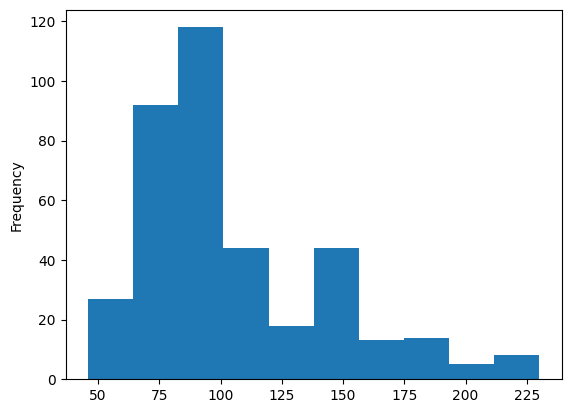

In [179]:
# create a histogram plot of the diffrent horsepower veichles in bins of 10
df['horsepower'].plot(kind='hist', bins=10)

It shows that there are lot of cars inbetween 75 and 100 horsepower compared to other bins

<Axes: ylabel='Frequency'>

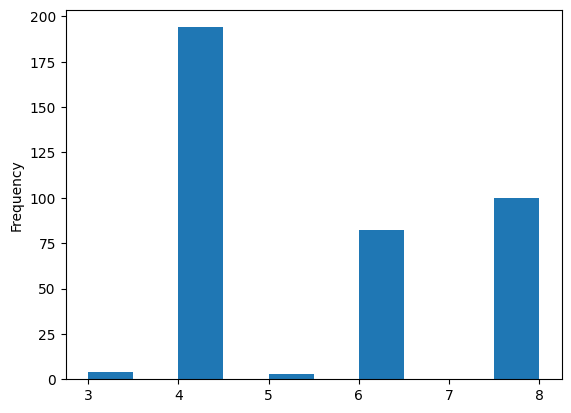

In [180]:
df.cylinders.plot(kind='hist')

For the number of cylinders it shows that 4 cylinders has the most number followed by 8 then 6

#Check for correlation between variables





Fuel efficiency (mpg) is negatively correlated with horsepower, weight, cylinders, and displacement, indicating that heavier and more powerful cars tend to have lower mpg. These features (horsepower, weight, cylinders, displacement) are positively correlated with each other, suggesting that they tend to increase or decrease together in vehicles.

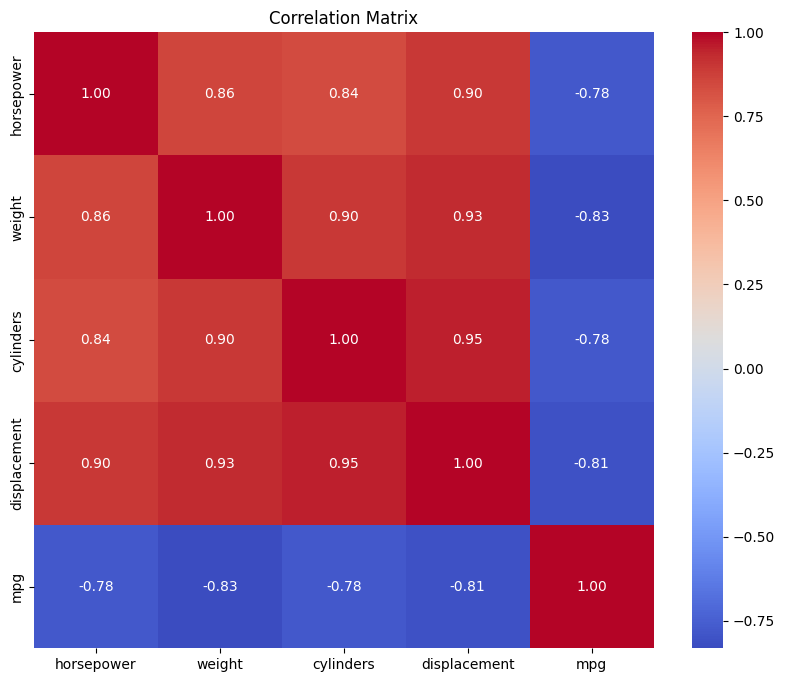

In [181]:


correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# polynomial regression

# Train the Dataset

X the features are horsepower, weight, cylinders, displacement
Y the MPG is out predictior from the features.
we use 80% of the data as our training set and the rest as out testing dataset, and in ored to produce a consistent result we will use random_state=42

In [182]:
# Define features (X) and target (y)
X = df[['horsepower', 'weight', 'cylinders', 'displacement']]
y = df['mpg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

To test out multiple degress of the polynomial regression model I will use (1, 2,3, 5, 20)

In [183]:
degrees = [1,2, 3, 5,20]  # degree for polynomial
mse_values = [] # list to store diffrent mse values for diffrent degrees
r2_values = [] # same as the mse but for R-squared

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on the test set and calculate MSE
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    r2_poly = r2_score(y_test, y_pred)
    r2_values.append(r2_poly)
    #print out each degree, mean squared error and R-squared to compare
    print(f"Degree {degree}: MSE = {mse} r2={r2_poly}")

Degree 1: MSE = 13.66086865521684 r2=0.7209507084964265
Degree 2: MSE = 12.960275671572116 r2=0.7352616561127611
Degree 3: MSE = 81.38991247998193 r2=-0.6625441607187685
Degree 5: MSE = 57799.158865592406 r2=-1179.6580341277745
Degree 20: MSE = 429460.6485638027 r2=-8771.552663745091


# Find the best degree

Find the best Degree by finding the model with the least meas square error, and this usuless translate to higher R-squared as well, which shows a good fit for the model. In this case degree =2 has the best model with the lowset mean square error of 12.96 and R-squared of 0.735

In [184]:
best_degree = degrees[mse_values.index(min(mse_values))]
print(f"Best Degree: {best_degree} with MSE = {min(mse_values)} And R2 = {r2_values[mse_values.index(min(mse_values))]}")


Best Degree: 2 with MSE = 12.960275671572116 And R2 = 0.7352616561127611


# Try out other models

Testing the Decition tree model and Random Forest Regressor to see what model shows the best results, We will use the same Mean Square Error and R-square parameters to determine which model is a better fit

In [185]:
# Decision Tree Regressor
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Regressor: MSE = {mse_dt} r2={r2_dt}")

# Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor: MSE = {mse_rf} r2={r2_rf}")

# Compare the performance of all models
models = {
    "Linear Regression (Degree 1)": mse_values[0],
    "Linear Regression (Degree 2)": mse_values[1],
    "Linear Regression (Degree 3)": mse_values[2],
    "Linear Regression (Degree 5)": mse_values[3],
    "Linear Regression (Degree 100)": mse_values[4],
    "Decision Tree Regressor": mse_dt,
    "Random Forest Regressor": mse_rf
}

best_model = min(models, key=models.get)
print(f"\nBest Model: {best_model} with MSE = {models[best_model]}")


Decision Tree Regressor: MSE = 31.14857142857143 r2=0.3637310329331074
Random Forest Regressor: MSE = 13.060115600649349 r2=0.7332222351816382

Best Model: Linear Regression (Degree 2) with MSE = 12.960275671572116


It shows that Linear regression with Degree 2 beats other models, something to notice is that the Random Forest regressor model came really close to the degree 2 model.

# Conclusion

We can use Mean Squared Error (MSE) to determine which model has the best predicition, as lower number in mean square error shows that the prediction is better, and R-squared to confirm wich model is better at explaining the variance in the datapoints, (higher number shows better relationships)



*   Decision Tree Regressor: MSE = 28.63. r2=0.3637310329331074
*   Random Forest Regressor: MSE = 13.08. r2=0.7332222351816382. This indicates better performance compared to the Decision Tree model.
*   Linear Regression (Degree 2): MSE = 12.96. r2=0.7352616561127611 This was the best-performing model among those tested. However by only a slight margine compared to the Random Forest Regressor Model









**Explanation:**

Linear Regression (Degree 2) performing the best suggests that there might be a non-linear relationship between the predictors (horsepower, weight, cylinders, displacement) and the target variable (mpg). The polynomial features (degree 2) helped capture this non-linearity, improving the model's accuracy.
Random Forest Regressor performed well very similar to the degree 2 polynomial model however the polynomial had a slightly better number,Decision Tree Regressor had the highest MSE, indicating that it may have overfitted the training data or struggled to capture the underlying patterns in the data.

**Conclusion:**

Based on these results, the Linear Regression model with a polynomial degree of 2 was the best model for predicting mpg in this dataset. This indicates that a non-linear relationship exists between the features and the target variable. The Random Forest model also performed well and could be a good alternative. The Decision Tree model was the least accurate in this scenario.